# Analiza vrednosti rabljenih avtomobilov
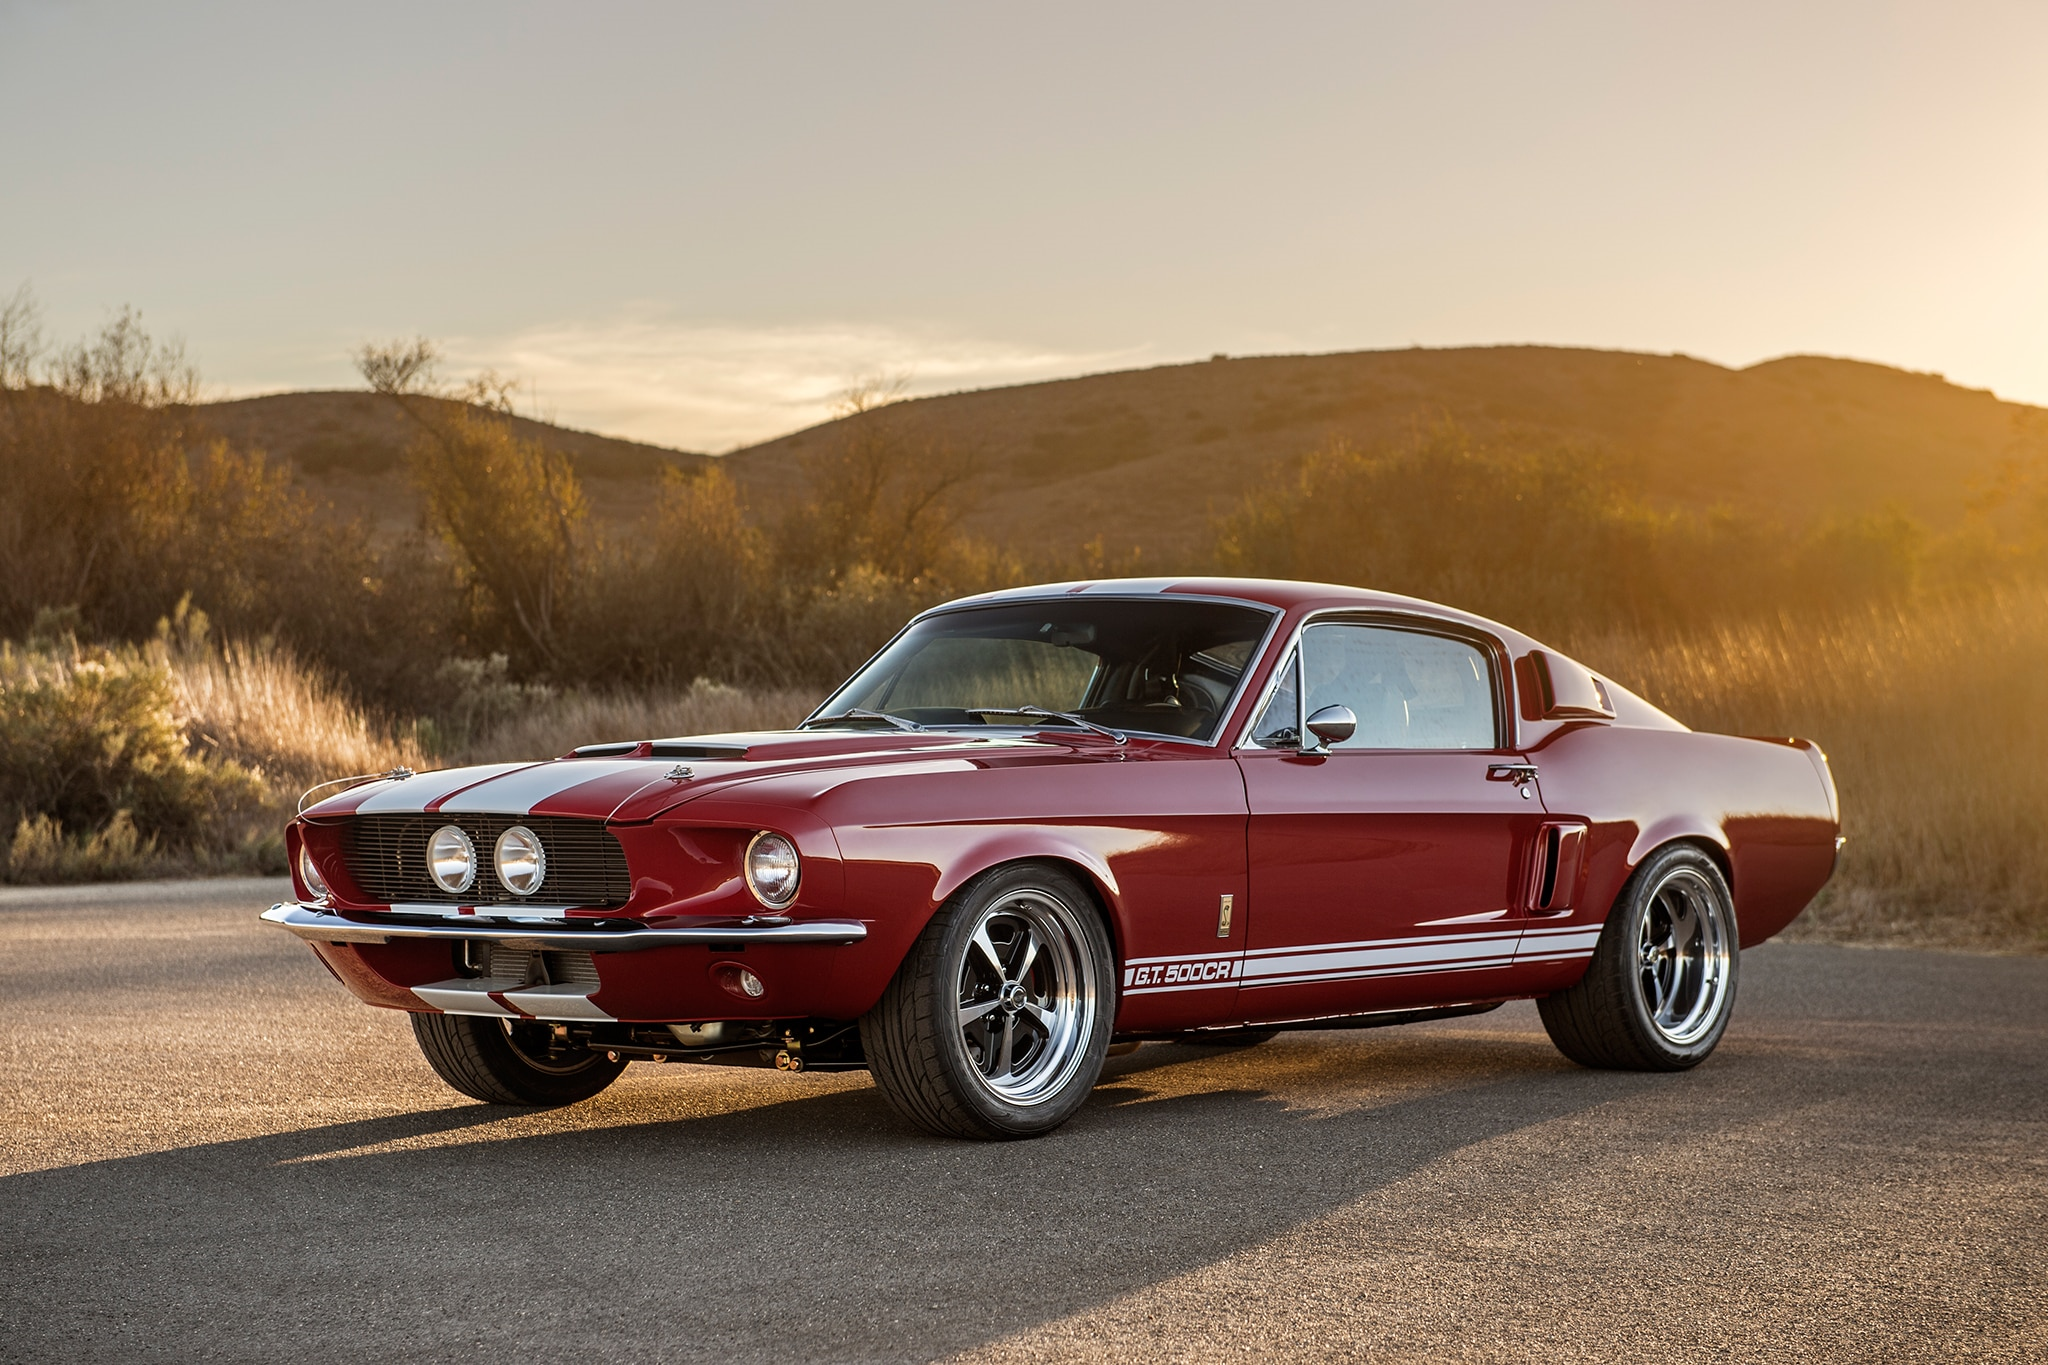
- V moji projektni nalogi bom analiziral cene rabljenih avtomobilov na spletni strani https://avto.net. Ker je to največja spletna stran za prodajo avtomobilov v Sloveniji, mislim, da bo to dober prikaz splošnih cen avtomobilov v sloveniji.
- Za vsak avomobil bom imel podatke o znamki avtomobila, ceni, letu 1. registracije, motorju, menjalniku in številu prevoženih kilometrov.
- Cilj naloge je predvsem ugotovit kako je cena avtomobila posameznega modela odvisna od števila prevoženih kilometrov in leta 1. registarcije avtomobila. Prav tako me zanima kako na ceno vpliva drugačna vrsta motorja (bencin / diesel) in vrsta menjalnika (ročni / avtomatski).
- Na koncu bom analiziral, ali lahko dokaj natančno napovemo ceno avtomobila, če poznamo znamko in model avtomobila, število prevoženih kilometrov in leto 1. registracije.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [40]:
# Razpredelnica avtomobilov za analizo
avtomobili_podatki = pd.read_csv('cars_data.csv')
avtomobili_cena = pd.read_csv('cars_price.csv')*1000
avtomobili = pd.concat([avtomobili_podatki, avtomobili_cena], axis=1)
pd.options.display.max_rows = 10

#### Takole izgleda tabela mojih uvoženih podatkov 

In [41]:
avtomobili

brand                                   model  first_registration  \
0     Volkswagen        Passat Variant 2.0 TDI DSG 17...                2012   
1     Volkswagen        Passat 2.0 TDI Highline DSG B...                2008   
2     Volkswagen             Passat 2.0 TDI BMT Highline                2015   
3     Volkswagen                     Polo 9N Comfortline                2003   
4     Volkswagen        Golf Variant 2.0 TDI BMT High...                2016   
...          ...                                     ...                 ...   
4795        Ford  Kuga 4x2 1.5 TDCi Titanium Powershi...                2017   
4796        Ford                         C-Max 1.6 Trend                2006   
4797        Ford  S-Max 2.0 TDCi Titanium..nakup na 7...                2011   
4798        Ford                 Focus 1.6 TDCi Ambiente                2009   
4799        Ford                           S-Max 2.0TDCI                2008   

      kilometers     engine transmission    price  
0       251200.0     diesel   avtomatski   7222.0  
1       240000.0     diesel   avtomatski   4500.0  
2       176000.0     diesel        roèni  17999.0  
3        97000.0  bencinski        roèni   2500.0  
4       151000.0     diesel   avtomatski  12996.0  
...          ...        ...          ...      ...  
4795     55000.0     diesel   avtomatski  19990.0  
4796    204446.0  bencinski        roèni   2100.0  
4797    211000.0     diesel        roèni   7995.0  
4798    165800.0     diesel        roèni   3290.0  
4799    308685.0     diesel        roèni   5500.0  

[4800 rows x 7 columns]

0        7222.0
1        4500.0
2       17999.0
3        2500.0
4       12996.0
         ...   
4795    19990.0
4796     2100.0
4797     7995.0
4798     3290.0
4799     5500.0
Name: price, Length: 4800, dtype: float64

In [35]:
avtomobili.iloc[4799]

brand                          Ford
model                 S-Max 2.0TDCI
first_registration             2008
kilometers                   308685
engine                       diesel
transmission                  roèni
price                           5.5
Name: 4799, dtype: object

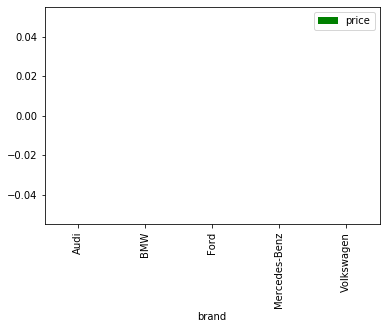

In [19]:
avti_po_znamki = avtomobili[['brand', 'price']].groupby('brand')
povp_cena = avti_po_znamki.mean() // 10000
max_in_povp_cena = []
povp_cena.plot.bar(color='green')